# Watts-Strogatz Model
### The Watts-Strogatz Model requires 3 parameters, $n$ for the number of nodes, $k$, an even number, for the mean degree, and a special parameter $\beta$ where $0<\beta<1$. A graph of $n$ nodes is first created, with each node connected to $k/2$ nodes to their immediate left and right. Each edge in the graph is then rewired with probability $\beta$, and this is done so without duplication or self-looping.


In the Watts-Strogatz model, the nodes and edges are first created, then rewired with probability $\beta$. In our model, we will first determine using $\beta$ if an edge will be rewired, then add it to either its neighbours or a random node excluding the neighbours.

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from collections import Counter

def watts_strogatz(n, k, beta):
    
    g = nx.Graph()
    for node in range(n):
        
        # A list of nodes which the edge can be rewired to are created
        nodes = list(range(n))
        nodes.remove(node)
        for neighbour in range(int(k/2)):
            if node+neighbour+1 >=n:
                nodes.remove(node+neighbour+1-n)
            else:
                nodes.remove(node+neighbour+1)
            if node-neighbour-1 < 0:
                nodes.remove(node-neighbour-1+n)
            else:
                nodes.remove(node-neighbour-1)
                
        for i in range(int(k/2)):
        
            # b is a probability to determine if the edge created will be rewired, if it's less than beta
            b = np.random.ranf(1)
            if b <= beta:
                
                # The edge is then rewired by selecting a node and adding the edge
                while True:
                    node_chosen = np.random.choice(nodes)
                    if g.has_edge(node_chosen, node):
                        continue
                    else:
                        g.add_edge(node_chosen, node)
                        break

            # Normal addition if b>=beta
            else:
                if node+i+1 >= n:
                    g.add_edge(node, node+i+1-n)
                else:
                    g.add_edge(node, node+i+1)
    return g
        

Below is the modified and vectorized version.

In [7]:
def watts_strogatz_2(n, k, beta):
    def rewiring(node):
        nodes = list(range(n))
        nodes.remove(node)
        while True:
            target = np.random.choice(nodes)
            if (node, target) in edges:
                continue
            else:
                return (node, target)
    g = nx.Graph()
    b = np.random.ranf(int(n*k/2)).reshape(n, int(k/2)) > beta
    edges = list(map(lambda i, j: (i, i + 1 +j) if i + 1 + j < n else (i, i + 1 + j - n), \
                     np.nonzero(b)[0], np.nonzero(b)[1]))
    b = b==0
    rewires = list(map(rewiring,np.nonzero(b)[0]))
    edges.extend(rewires)
    g.add_edges_from(edges)
    return g

In [21]:
def watts_strogatz_2(n, k, beta):
    g = nx.Graph()
    edges = []
    def edges_add(node):
        targets = list(range(n))
        targets.remove(node)
        b = np.random.ranf(k//2) < beta
        addition = [(node, node+i) if node+i < n else (node, node+i-n) for i in range(1, k//2+1)]
        addition = [addition[i] if b[i] == 0 else (node, np.random.choice(targets)) for i in range(k//2)]
        edges.extend(addition)
        return
    edge = list(map(edges_add, range(n)))
    g.add_edges_from(edges)
    return g

Testing out and comparing the new function. The new function is weirdly enough, slower.

In [25]:
toc = time.time()
g = watts_strogatz_2(500, 100, 0.3)
plt.show()
plt.clf()
print(nx.info(g))
print(nx.transitivity(g))
print(nx.average_clustering(g))
tic = time.time()
print(f"Time taken: {tic-toc}")

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 23737
Average degree:  94.9480
0.35814426901343543
0.3589022664970692
Time taken: 1.8455734252929688


<Figure size 432x288 with 0 Axes>

With the function defined, we can now test it by drawing a graph, and comparing it to one drawn using the function defined in the networkx module. In this example, we will use $n = 50$, $k = 8$, and $\beta = 0.2$.

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 200
Average degree:   8.0000
Global clustering coefficient: 0.3922857142857143


C:\Users\kjkchang\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


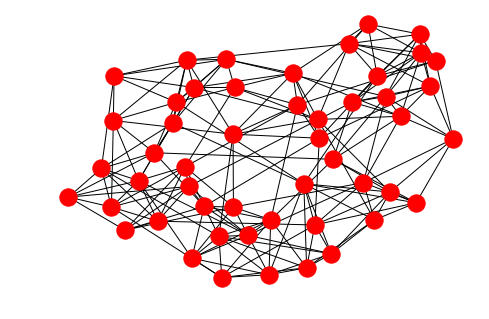

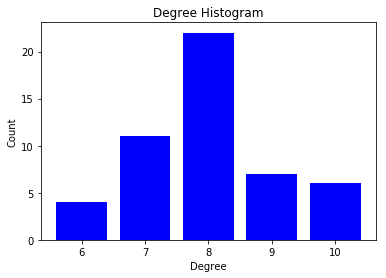

In [10]:
from collections import Counter

graph = watts_strogatz(50, 8, 0.2)
print(nx.info(graph))
print(f"Global clustering coefficient: {nx.average_clustering(graph)}")
nx.draw(graph)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

Below is a graph drawn using the networkx watts_strogatz_graph() function, with the same values of $n$, $k$, and $\beta$. 

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1029
Average degree:  20.5800
Global clustering coefficient: 0.2085884016418746


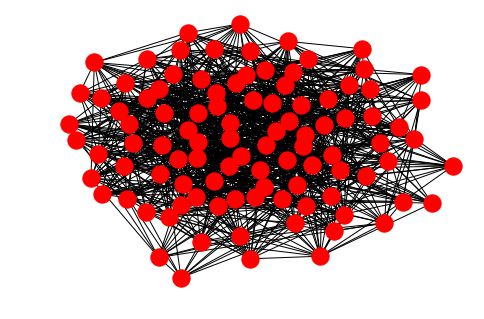

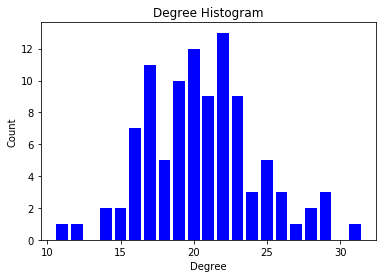

In [34]:
graph = nx.erdos_renyi_graph(100, 0.2)
print(nx.info(graph))
print(f"Global clustering coefficient: {nx.average_clustering(graph)}")
nx.draw(graph)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), width=0.80, color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()